In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

path = "data/character_trajectories/dataset_steps-20_timesteps-206.pickle"
with open(path, "rb") as f:
    data = pickle.load(f)

if len(data) == 4:
    trainX, trainY, testX, testY = data
else:
    trainX, trainY, valX, valY, testX, testY = data
    
if not type(trainY[0]) is int:
    trainY = np.argmax(trainY, axis=1)
    if len(data) == 6:
        valY = np.argmax(valY, axis=1)
    testY = np.argmax(testY, axis=1)

In [2]:
def sort_by_class(dataX, dataY):
    result = [[] for _ in range(len(np.unique(dataY)))]
    for i in range(len(dataY)):
        result[dataY[i]].append(dataX[i])
    return result

def plot_class_sample(dataSort, c, s):
    plt.plot(dataSort[c][s])
    plt.show()
    
def plot_class_slice(dataSort):
    n_rows = int(np.sqrt(len(dataSort)))
    n_cols = int(np.ceil(len(dataSort) / n_rows))
    g, b = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
    for i, cData in enumerate(dataSort):
        x = i % n_cols
        y = i // n_cols
        b[y][x].plot(cData[0])
        b[y][x].set_title('Class: %s' % (i))
        
    plt.subplots_adjust(wspace=0.4, hspace=0.5)
    plt.show()

In [3]:
trainSort = sort_by_class(trainX, trainY)

Sample of class 0. This class covers the character 'a'.

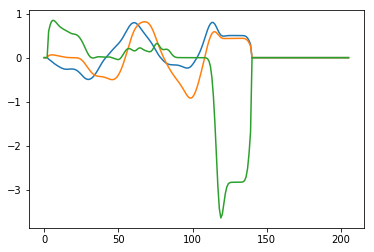

In [4]:
plot_class_sample(trainSort, 0, 0)

One sample for each class.

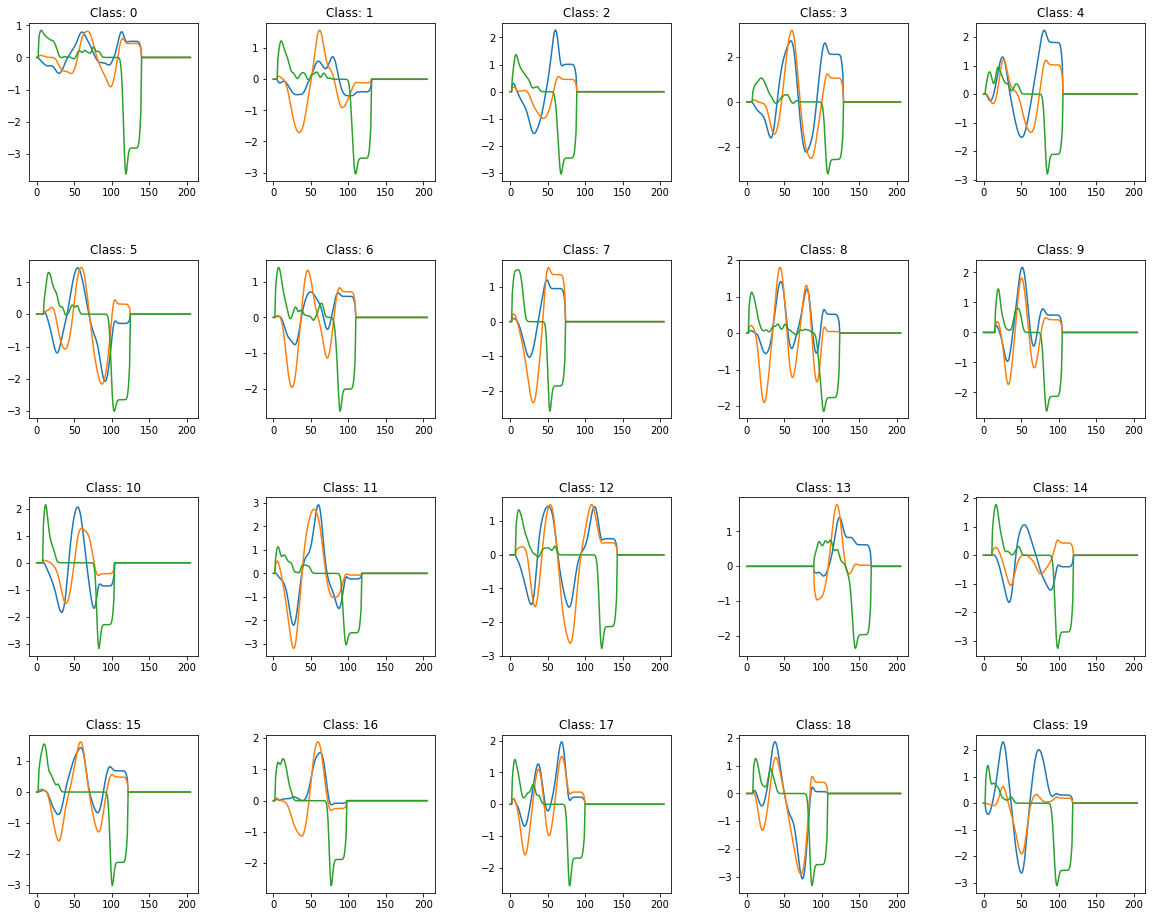

In [5]:
plot_class_slice(trainSort)

Labels of the character trajectories dataset.

In [6]:
#ONLY FOR CHARACTER
import scipy.io 

mat = scipy.io.loadmat('data/character_trajectories/mixoutALL_shifted.mat')
chars = np.array([d[0] for d in np.squeeze(mat['consts'][0][0][3])])

s = ''
for i, c in enumerate(chars):
    s += str(i) + ': ' + c + ' | '
s = s[:-2]
print(s)

0: a | 1: b | 2: c | 3: d | 4: e | 5: g | 6: h | 7: l | 8: m | 9: n | 10: o | 11: p | 12: q | 13: r | 14: s | 15: u | 16: v | 17: w | 18: y | 19: z 


In [7]:
def convert_to_plot(xy_data):
    grid_dir = int(np.ceil(np.max(np.sum(abs(xy_data), axis=0))))

    dots = []
    x_pos, y_pos, tip = 0, 0, 1
    dots.append([x_pos, y_pos, tip])
    for (x, y, t) in xy_data:
        x_pos += x
        y_pos += y
        tip += t
        dots.append([x_pos, y_pos, tip])

    dots = np.transpose(np.array(dots), [1,0])
    return dots

def plot_dots(dots):
    plt.scatter(dots[0], dots[1], c=dots[2], cmap='Greys')
    plt.show()

In [14]:
def get_window(org, syn):
    ts = 0
    diff = False
    window = []
    for i in range(org.shape[0]):
        if np.any(org[i] != syn[i]):
            if not diff:
                diff = True
                ts = i
        elif diff:
            window.append([ts, i-1])
            diff = False
    return np.array(window)

def compare_idx(builds, idx, chars):
    org = builds[idx][0]
    syn = builds[idx][1]

    window = get_window(org, syn)

    org_plot = convert_to_plot(org)
    syn_plot = convert_to_plot(syn)
    
    labels = [chars[i] for i in builds[idx][2:]]
    return org, syn, org_plot, syn_plot, window, labels


def plot_compare(org, syn, org_plot, syn_plot, window, labels):
    fig, ax = plt.subplots(2,2)
    fig.suptitle('GT: %s | Pred: %s | Build: %s' % (labels[0], labels[1], labels[2]))
    ax[0,0].plot(org)
    ax[0,1].plot(syn)
    ax[1,0].scatter(org_plot[0], org_plot[1], c=org_plot[2], cmap='Greys')
    ax[1,1].scatter(syn_plot[0], syn_plot[1], c=syn_plot[2], cmap='Greys')
    
    for w in window:
        break
        ax[0,0].axvspan(w[0], w[1], alpha=0.5, color='yellow')
        ax[0,1].axvspan(w[0], w[1], alpha=0.5, color='yellow')
        
        ax[1,0].scatter(org_plot[0][w[0]:w[1]], org_plot[1][w[0]:w[1]], c='yellow', marker='.')
        ax[1,1].scatter(syn_plot[0][w[0]:w[1]], syn_plot[1][w[0]:w[1]], c='yellow', marker='.')
    
    plt.show()
    
def sort_by_class_builds(builds):
    result = [[] for _ in range(len(np.unique(builds[:, 2])))]
    for i in range(len(builds)):
        result[builds[i,2]].append(builds[i])
    return result

def plot_each_class(sort_by_class_builds):
    for i in range(len(sort_by_class_builds)):
        bi = [sort_by_class_builds[i][0]]
        for j in range(len(sort_by_class_builds[i])):
            s = sort_by_class_builds[i][j] 
            if s[2] == s[3]:
                bi = [sort_by_class_builds[i][j]]
                break
        org, syn, org_plot, syn_plot, window, labels = compare_idx(bi, 0, chars)
        plot_compare(org, syn, org_plot, syn_plot, window, labels)

Comparison of original sample and a modified version wiht the prototypes used to replace data slices.

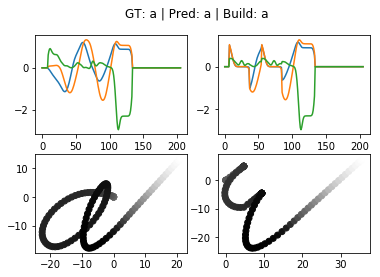

In [15]:
builds = np.load('saved_model/character_trajectories/char_l3_p3_interpretable/build_compare.npy', allow_pickle=True)
builds_decoded = np.load('saved_model/character_trajectories/char_l3_p3_interpretable/build_compare_decoded.npy', allow_pickle=True)
builds_no_ae = np.load('saved_model/character_trajectories/char_l3_p3_noAE/build_compare.npy', allow_pickle=True)

c = 0
s = 1

sort_by_class_test = sort_by_class_builds(builds)
org, syn, org_plot, syn_plot, window, labels = compare_idx([sort_by_class_test[c][s]], 0, chars)
plot_compare(org, syn, org_plot, syn_plot, window, labels)

Plot for each class.

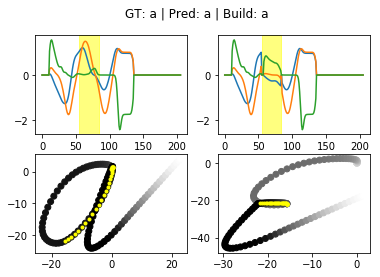

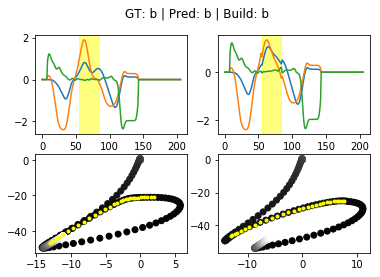

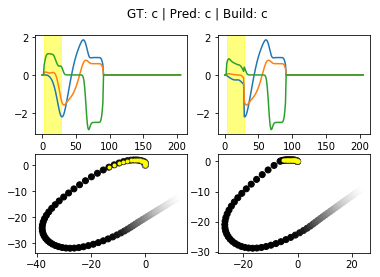

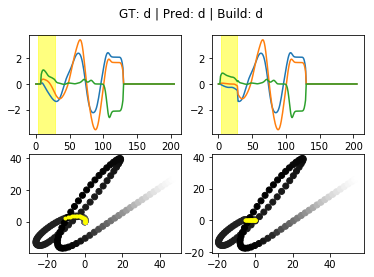

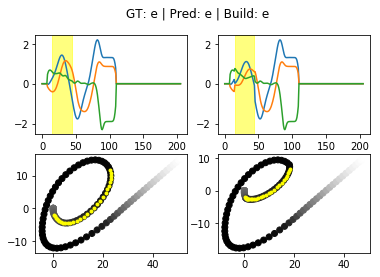

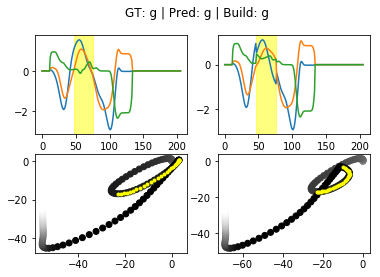

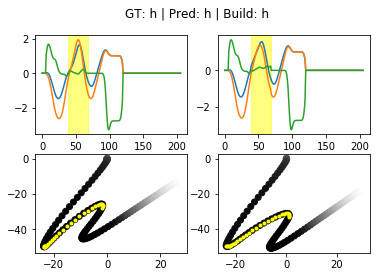

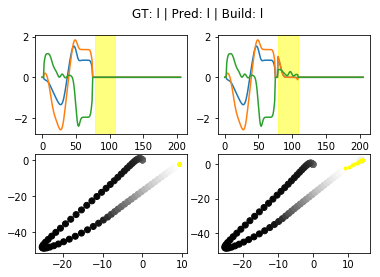

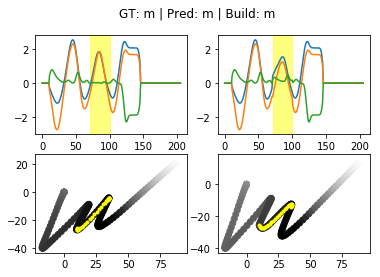

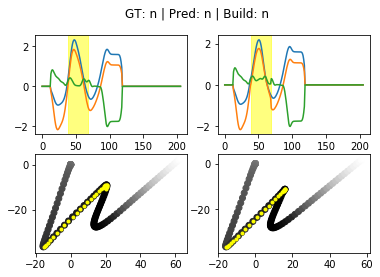

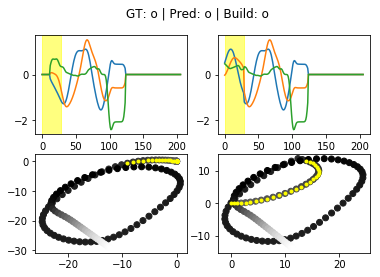

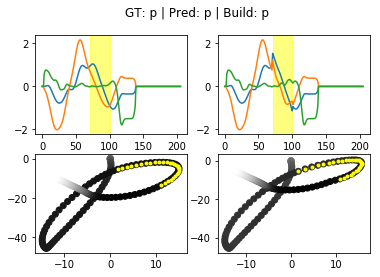

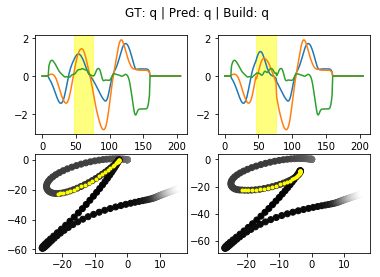

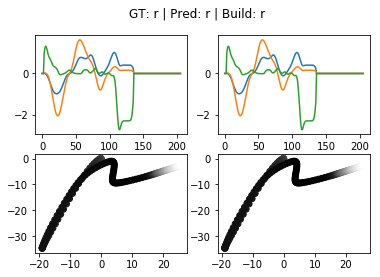

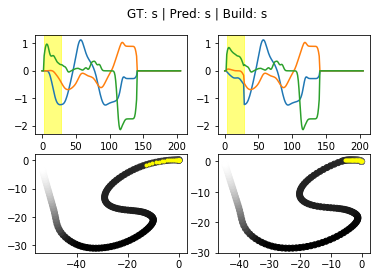

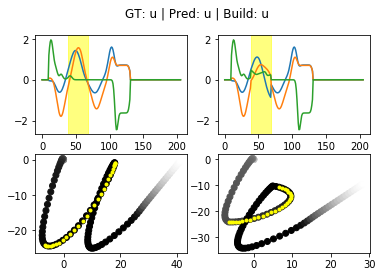

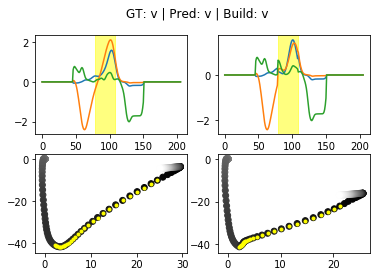

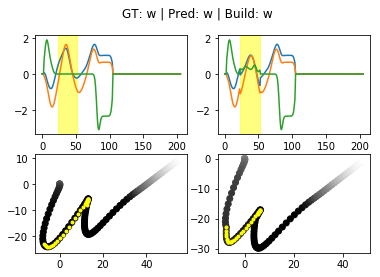

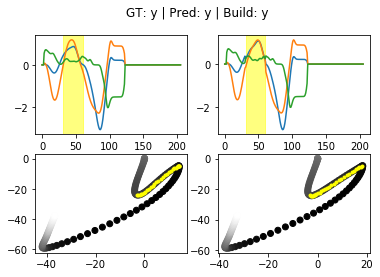

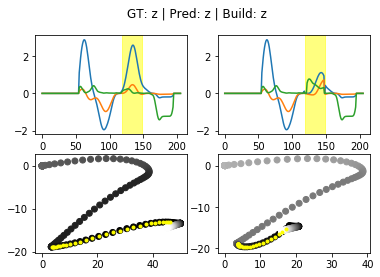

In [65]:
plot_each_class(sort_by_class_test)